In [51]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import scipy 
import sys 
import os 
import pickle 
import librosa
import librosa.display
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf 
from tensorflow import keras

Read the CSV file

In [52]:
df = pd.read_csv('D:/Klasifikasi Music/Data/features_3_sec.csv')
df.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.0.wav,66149,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.630869,1972.744388,117335.771563,...,39.687145,-3.241280,36.488243,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767,blues
1,blues.00000.1.wav,66149,0.343065,0.086147,0.112699,0.001450,1816.693777,90525.690866,2010.051501,65671.875673,...,64.748276,-6.055294,40.677654,0.159015,51.264091,-2.837699,97.030830,5.784063,59.943081,blues
2,blues.00000.2.wav,66149,0.346815,0.092243,0.132003,0.004620,1788.539719,111407.437613,2084.565132,75124.921716,...,67.336563,-1.768610,28.348579,2.378768,45.717648,-1.938424,53.050835,2.517375,33.105122,blues
3,blues.00000.3.wav,66149,0.363639,0.086856,0.132565,0.002448,1655.289045,111952.284517,1960.039988,82913.639269,...,47.739452,-3.841155,28.337118,1.218588,34.770935,-3.580352,50.836224,3.630866,32.023678,blues
4,blues.00000.4.wav,66149,0.335579,0.088129,0.143289,0.001701,1630.656199,79667.267654,1948.503884,60204.020268,...,30.336359,0.664582,45.880913,1.689446,51.363583,-3.392489,26.738789,0.536961,29.146694,blues


About the Dataset

In [53]:
df.shape

(9990, 60)

In [54]:
df.dtypes

filename                    object
length                       int64
chroma_stft_mean           float64
chroma_stft_var            float64
rms_mean                   float64
rms_var                    float64
spectral_centroid_mean     float64
spectral_centroid_var      float64
spectral_bandwidth_mean    float64
spectral_bandwidth_var     float64
rolloff_mean               float64
rolloff_var                float64
zero_crossing_rate_mean    float64
zero_crossing_rate_var     float64
harmony_mean               float64
harmony_var                float64
perceptr_mean              float64
perceptr_var               float64
tempo                      float64
mfcc1_mean                 float64
mfcc1_var                  float64
mfcc2_mean                 float64
mfcc2_var                  float64
mfcc3_mean                 float64
mfcc3_var                  float64
mfcc4_mean                 float64
mfcc4_var                  float64
mfcc5_mean                 float64
mfcc5_var           

In [55]:
df = df.drop(labels='filename',axis=1)

Understanding the Audio Files

In [56]:
audio_recording = "D:/Klasifikasi Music/Data/genres_original/country/country.00050.wav"
data, sr = librosa.load(audio_recording)
print(type(data), type(sr))

<class 'numpy.ndarray'> <class 'int'>


In [57]:
data , sr = librosa.load(audio_recording)

In [58]:
librosa.load(audio_recording, sr=45600)

(array([ 0.04446705,  0.06373049,  0.05768819, ..., -0.13878523,
        -0.11868108, -0.05903753], dtype=float32),
 45600)

Python Display Audio

In [59]:
import IPython
IPython.display.Audio(data, rate=sr)

Visualisasi Audio Files

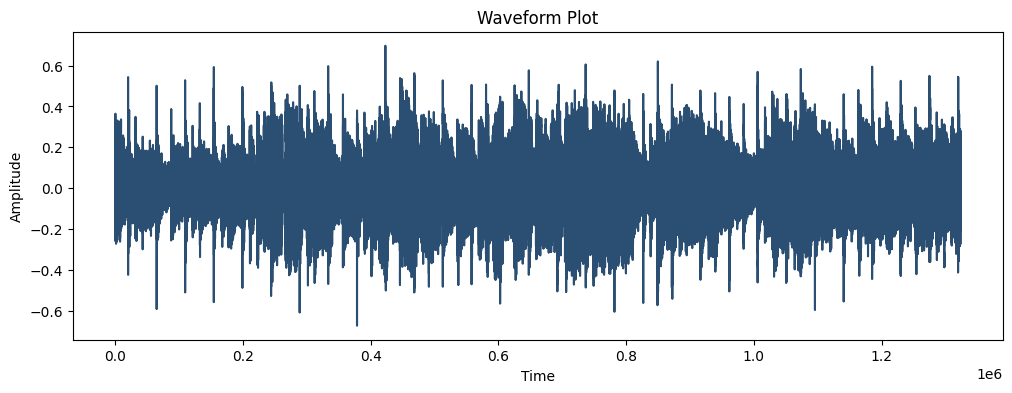

In [64]:
# plot raw wave files

from IPython.display import Audio

plt.figure(figsize=(12, 4))
plt.plot(data, color="#2B4F72")
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Waveform Plot')
plt.show()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_15608\4264169355.py:6: UserWarning: Trying to display complex-valued input. Showing magnitude instead.
  librosa.display.specshow(stft, sr=sr, x_axis ='time', y_axis='hz')


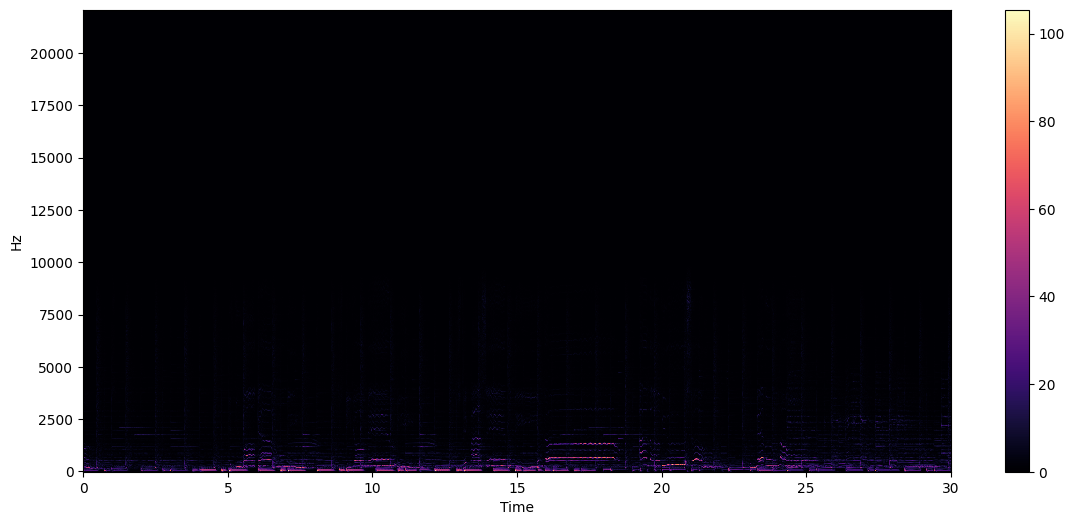

In [66]:
# spectograms 

stft = librosa.stft(data)
stft_db = librosa.amplitude_to_db(abs(stft))
plt.figure(figsize=(14, 6))
librosa.display.specshow(stft, sr=sr, x_axis ='time', y_axis='hz')
plt.colorbar()

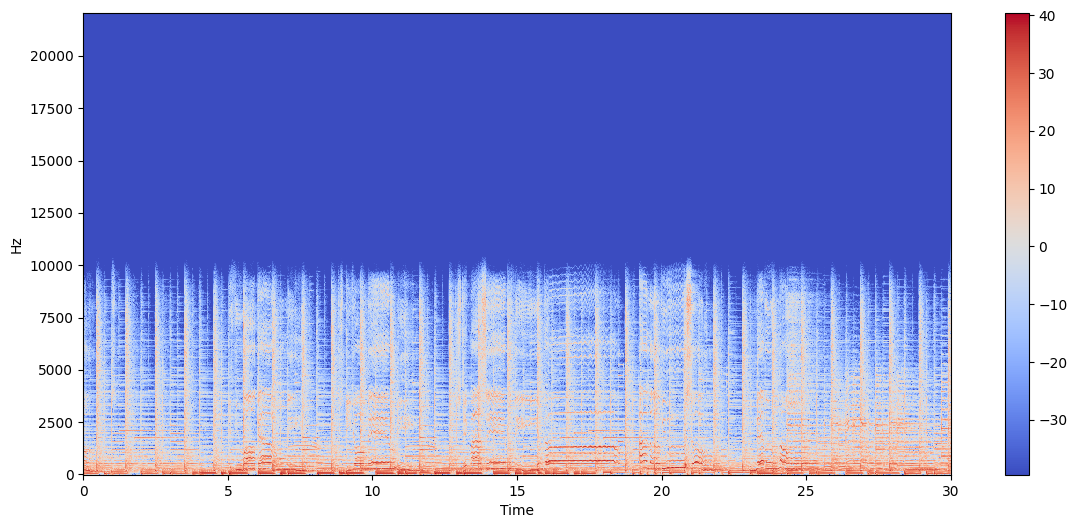

In [67]:
stft = librosa.stft(data)
stft_db = librosa.amplitude_to_db(abs(stft))
plt.figure(figsize=(14, 6))
librosa.display.specshow(stft_db, sr=sr, x_axis ='time', y_axis='hz')
plt.colorbar()

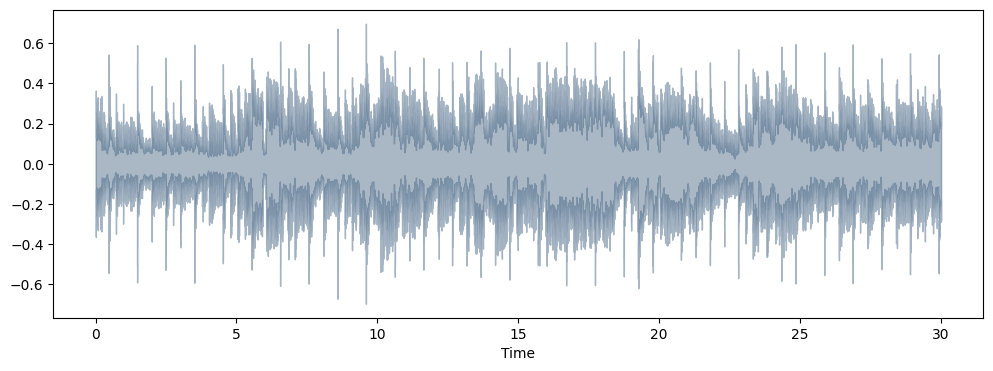

In [82]:
from sklearn.preprocessing import normalize
spectral_rolloff = librosa.feature.spectral_rolloff(y=data+0.01, sr=sr)[0]

# Visualize the audio waveform with spectral rolloff
plt.figure(figsize=(12, 4))
librosa.display.waveshow(data, sr=sr, color="#2B4F72", alpha=0.4)
plt.show()

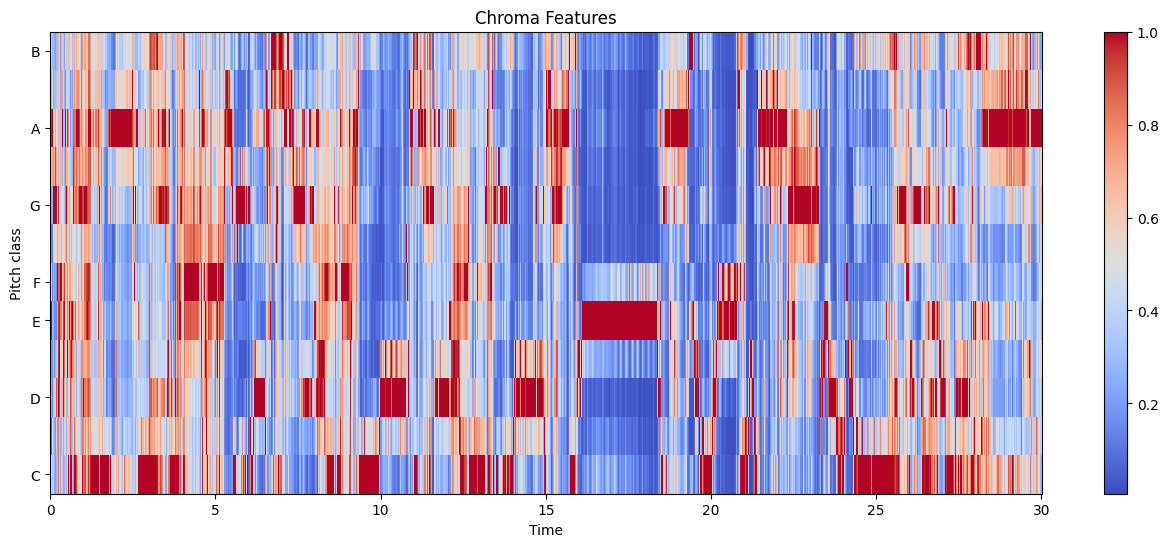

In [84]:
# Chroma feature

chroma = librosa.feature.chroma_stft(y=data, sr=sr)
plt.figure(figsize=(16,6))
librosa.display.specshow(chroma, sr=sr, x_axis='time', y_axis='chroma', cmap='coolwarm')
plt.colorbar()
plt.title("Chroma Features")
plt.show()

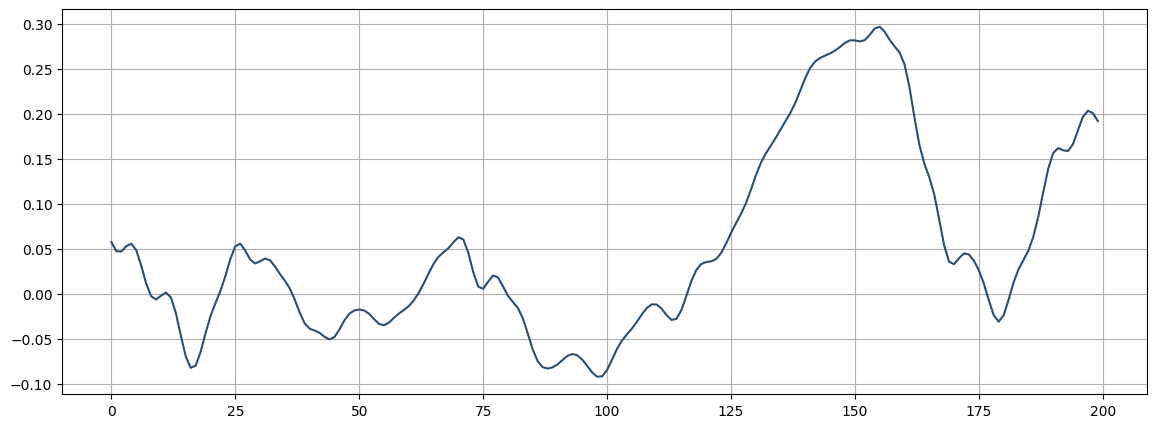

In [85]:
# zero crossing rate 

start = 1000
end = 1200
plt.figure(figsize=(14, 5))
plt.plot(data[start:end], color="#2B4F72")
plt.grid()

In [86]:
zero_cross_rate = librosa.zero_crossings(data[start:end], pad=False)
print("The number of zero-crossing is :",sum(zero_cross_rate))

The number of zero-crossing is : 10


In [88]:
class_list = df.iloc[:, -1]
convertor = LabelEncoder()

In [94]:
y = convertor.fit_transform(class_list)
y

array([0, 0, 0, ..., 9, 9, 9])

In [90]:
print(df.iloc[:, :-1])

      length  chroma_stft_mean  chroma_stft_var  rms_mean   rms_var  \
0      66149          0.335406         0.091048  0.130405  0.003521   
1      66149          0.343065         0.086147  0.112699  0.001450   
2      66149          0.346815         0.092243  0.132003  0.004620   
3      66149          0.363639         0.086856  0.132565  0.002448   
4      66149          0.335579         0.088129  0.143289  0.001701   
...      ...               ...              ...       ...       ...   
9985   66149          0.349126         0.080515  0.050019  0.000097   
9986   66149          0.372564         0.082626  0.057897  0.000088   
9987   66149          0.347481         0.089019  0.052403  0.000701   
9988   66149          0.387527         0.084815  0.066430  0.000320   
9989   66149          0.369293         0.086759  0.050524  0.000067   

      spectral_centroid_mean  spectral_centroid_var  spectral_bandwidth_mean  \
0                1773.065032          167541.630869              19

In [91]:
'''
scaling the features
rumus : 
z = (x-u)/s
'''

from sklearn.preprocessing import StandardScaler
fit = StandardScaler()
X = fit.fit_transform(np.array(df.iloc[:, :-1], dtype=float))

In [95]:
# Dividing Data Intro Training and Testing Sets

X_train, X_tets, y_train, y_test = train_test_split(X, y, test_size=0.33)
len(y_train)

6693

In [96]:
len(y_test)

3297

Building The Model

In [97]:
from keras.models import Sequential

In [108]:
def trainModel(model, epochs, optimizer):
    batch_size = 128
    model.compile(optimizer=optimizer,
                  loss='sparse_categorical_crossentropy',
                  metrics='accuracy'
    )
    return model.fit(X_train, y_train, validation_data=(X_tets, y_test), epochs=epochs,
                     batch_size=batch_size)

In [109]:
def plotValidate(history):
    print("Validation Accuracy",max(history.history["val_accuracy"]))
    pd.DataFrame(history.history).plot(figsize=(12, 6))
    plt.show()

In [110]:
model = keras.models.Sequential([
    keras.layers.Dense(512, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dropout(0.2),
    
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dropout(0.2),
    
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.2),

    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(0.2),

    keras.layers.Dense(10, activation='softmax'),
])
print(model.summary())
model_history = trainModel(model=model, epochs=600, optimizer='adam')

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 512)               30208     
                                                                 
 dropout_17 (Dropout)        (None, 512)               0         
                                                                 
 dense_22 (Dense)            (None, 256)               131328    
                                                                 
 dropout_18 (Dropout)        (None, 256)               0         
                                                                 
 dense_23 (Dense)            (None, 128)               32896     
                                                                 
 dropout_19 (Dropout)        (None, 128)               0         
                                                                 
 dense_24 (Dense)            (None, 64)               

Model Evalution

In [111]:
tets_loss, test_acc = model.evaluate(X_tets, y_test, batch_size=128)
print("The test Loss is : ",tets_loss)
print("\nThe Best test Accuracy is : ",test_acc*100)

26/26 [==============================] - 0s 2ms/step - loss: 0.6052 - accuracy: 0.9214
The test Loss is :  0.605227530002594

The Best test Accuracy is :  92.144376039505
